# <b>THE SPARKS FOUNDATION

<b>TASK 1 - Prediction using Supervised ML
    
<b>To Predict the percentage of marks of the students based on the number of hours they studied...

In [16]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [17]:
# Reading the Data 
info = pd.read_csv('http://bit.ly/w-data')
info.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
# Check if there any null value in the Dataset
info.isnull == True

False

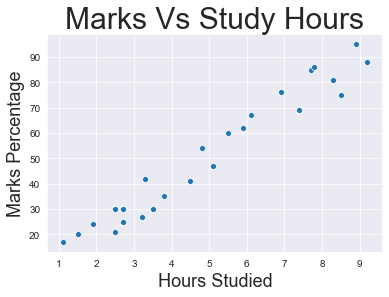

In [19]:
sns.set_style('darkgrid')
sns.scatterplot(y= info['Scores'], x= info['Hours'])
plt.title('Marks Vs Study Hours',size=30)
plt.ylabel('Marks Percentage', size=18)
plt.xlabel('Hours Studied', size=18)
plt.show()

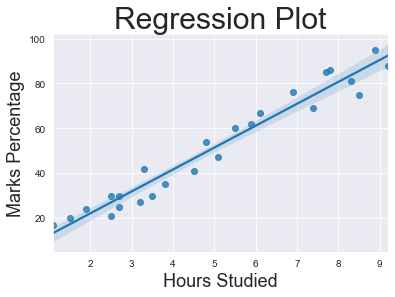

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [20]:
sns.regplot(x= info['Hours'], y= info['Scores'])
plt.title('Regression Plot',size=30)
plt.ylabel('Marks Percentage', size=18)
plt.xlabel('Hours Studied', size=18)
plt.show()
print(info.corr())

In [21]:
# Defining X and y from the Data
X = info.iloc[:, :-1].values   
y = info.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
print("train_X",train_X)
print("train_y",train_y)

train_X [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
train_y [86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [22]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("#########..Model Trained..########")

#########..Model Trained..########


In [23]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [24]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


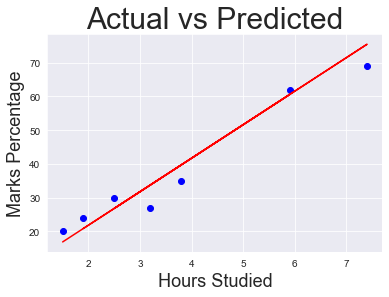

In [25]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='red')
plt.title('Actual vs Predicted', size=30)
plt.ylabel('Marks Percentage', size=18)
plt.xlabel('Hours Studied', size=18)
plt.show()

In [26]:
# Calculating the accuracy of the model

print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


<b>What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [28]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


<b>According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.